In [8]:
start = datetime(2018,2,15)
end = datetime(2022,4,15)

In [280]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

data = pd.read_csv('B.csv')
data['Date'] = pd.to_datetime(data['Date'])


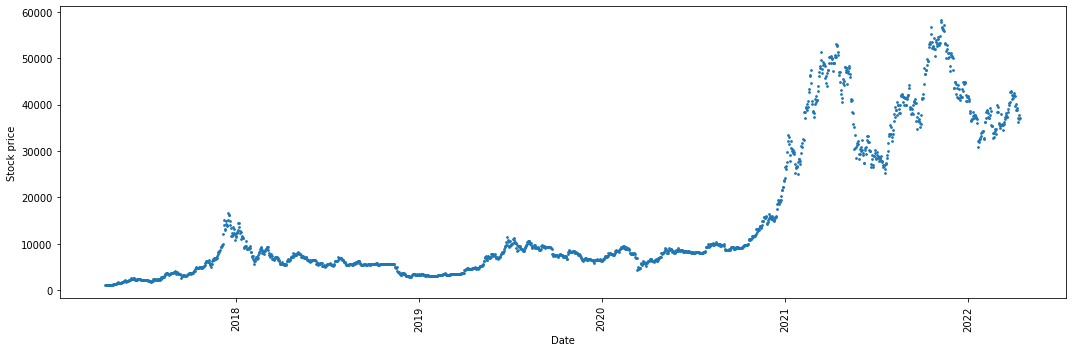

In [281]:

fig = plt.figure(figsize=(15, 5))

plt.tick_params(axis='x',labelsize=10,rotation=90)
plt.scatter(data.Date,data.Close,s = 3) # Your data
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.tight_layout()
plt.show()

In [284]:
def plot(stock,start_date,end_date) :
    stock = stock.set_index('Date')
    data = stock.loc[start_date:end_date,:]
    
    fig = plt.figure(figsize=(15, 5))

    plt.tick_params(axis='x',labelsize=10,rotation=90)
    plt.scatter(data.index,data.Close,s = 3) # Your data
    plt.xlabel('Date')
    plt.ylabel('Stock price')
    plt.tight_layout()
    plt.show()

In [24]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

def achat_vente_simple(stocks,buying_date,selling_date,eur) : 
    mask1 = (stocks['Date'] == buying_date)
    mask2 = (stocks['Date'] == selling_date)
    price_buying = stocks.loc[mask1,'Close'].values[0]
    price_selling = stocks.loc[mask2,'Close'].values[0]
    diff_percentage = (price_selling - price_buying)/price_selling
    
    potential_return = eur + eur*diff_percentage 
    return potential_return


#frequency in days

def DCA(stocks,start_date,end_date,frequency,eur) :
    
    sum_price = 0
    compteur = 0
    t = timedelta(days = frequency)
    current_date = start_date
    diff_percentage = 0
    
    mask2 = (stocks['Date'] == end_date)
    price_selling = stocks.loc[mask2,'Close'].values[0]
    
    while current_date < end_date :
        mask1 = (stocks['Date'] == current_date)
        price_buying = stocks.loc[mask1,'Close'].values[0]
        sum_price = sum_price + price_buying
        compteur = compteur + 1
        current_date = current_date + t
    
    avg_buying_price = sum_price/compteur
    diff_percentage = (price_selling - avg_buying_price)/price_selling
    eur_depense = compteur*eur
    potential_return = eur_depense + eur_depense*diff_percentage 
    
    return potential_return,eur_depense








(62.17777340044391, 67.35254213637707)

In [35]:
start_date = datetime(2018,2,15)
end_date = datetime(2022,4,15)


In [36]:
achat_vente_simple(data,start_date,end_date,1000)


1781.4141890550857

In [40]:
DCA(data,start_date,end_date,7,25)


(8361.151379557205, 5450)

In [38]:
DCA_optimize(data,start_date,end_date,15,[0,74])

(5139.236325355385, 3330.055153575369)

In [251]:
def mapping_eur_coef(range_eur,percentage) :
    
   
    eur_invest = ((range_eur[0]-range_eur[1])/(0.1))*percentage
    
    return eur_invest

In [252]:
def average_price_on_x_days_before(stocks,date,x) :
    t = timedelta(days = 1)
    sum_price = 0
    current_date = date
    for i in range(x) :
        mask1 = (stocks['Date'] == current_date)
        price_buying = stocks.loc[mask1,'Close'].values[0]
        sum_price = sum_price + price_buying
        current_date = current_date - t
    avg = sum_price/x
    return avg


In [253]:
def buy(stocks,date,amount,portefolio_total_eur,portefolio_btc_devise_btc) : 
    mask = (stocks['Date'] == date)
    price = stocks.loc[mask,'Close'].values[0]
    
    if portefolio_total_eur >= amount : 
        new_portefolio_btc_devise_btc = portefolio_btc_devise_btc + amount/price 
        new_portefolio_total_eur = portefolio_total_eur - amount
        return new_portefolio_total_eur,new_portefolio_btc_devise_btc
    else :
        print("Sorry you don't have enough money")
        return portefolio_total_eur,portefolio_btc_devise_btc

In [254]:
def get_price_date_eur_portefolio_btc(stocks,date,portefolio_btc) :
    mask = (stocks['Date'] == date)
    price = stocks.loc[mask,'Close'].values[0]
    return portefolio_btc*price

In [255]:
def sell(stocks,date,amount,portefolio_total_eur,portefolio_btc_devise_btc) :
    mask = (stocks['Date'] == date)
    price = stocks.loc[mask,'Close'].values[0]
    if amount < get_price_date_eur_portefolio_btc(stocks,date,portefolio_btc_devise_btc):
        new_portefolio_btc_devise_btc = portefolio_btc_devise_btc - amount/price
        new_portefolio_total_eur = portefolio_total_eur + amount
        return new_portefolio_total_eur,new_portefolio_btc_devise_btc
    else :
        print("Sorry, you don't have enough bitcoin on your bitcoin portefolio")
        return portefolio_total_eur,portefolio_btc_devise_btc

In [256]:
start_date = datetime(2020,2,15)
end_date = datetime(2022,4,15)

In [257]:
portefolio_total_eur = 1000
portefolio_btc_devise_btc = 0.3

In [258]:
portefolio_total_eur,portefolio_btc_devise_btc=sell(data,start_date,1000,portefolio_total_eur,portefolio_btc_devise_btc)

In [259]:
portefolio_total_eur,portefolio_btc_devise_btc

(2000, 0.1904805337704985)

In [295]:
def DCA_optimize(stocks,start_date,end_date,frequency,range_eur,portefolio_total_eur,portefolio_btc_devise_btc) :
    
    new_portefolio_total_eur = portefolio_total_eur
    new_portefolio_btc_devise_btc = portefolio_btc_devise_btc
    
    sum_price = 0
    sum_euro_invest = 0
    
    t = timedelta(days = frequency)
    current_date = start_date
    diff_percentage = 0
    
    mask2 = (stocks['Date'] == end_date)
    price_selling = stocks.loc[mask2,'Close'].values[0]
    
    
    
    
    while current_date < end_date :
        print(current_date)
        
        mask1 = (stocks['Date'] == current_date)
        price_buying = stocks.loc[mask1,'Close'].values[0]
        
        avg_price_3_days = average_price_on_x_days_before(data,current_date,10)
        
        percentage = (price_buying - avg_price_3_days)/price_buying
        eur_invest = mapping_eur_coef(range_eur,percentage)
        
        
        
        if eur_invest < -3 :
            print("sell",eur_invest)
            new_portefolio_total_eur,new_portefolio_btc_devise_btc = sell(data,current_date,abs(eur_invest),new_portefolio_total_eur,new_portefolio_btc_devise_btc)
        
        elif eur_invest > 3 :
            print("buy",eur_invest)
            new_portefolio_total_eur,new_portefolio_btc_devise_btc = buy(data,current_date,abs(eur_invest),new_portefolio_total_eur,new_portefolio_btc_devise_btc)
        
        current_date = current_date + t
        
        print(new_portefolio_total_eur,new_portefolio_btc_devise_btc)
    
    
    return new_portefolio_total_eur,new_portefolio_btc_devise_btc


In [296]:
start_date = datetime(2021,4,1)
end_date = datetime(2022,4,15)

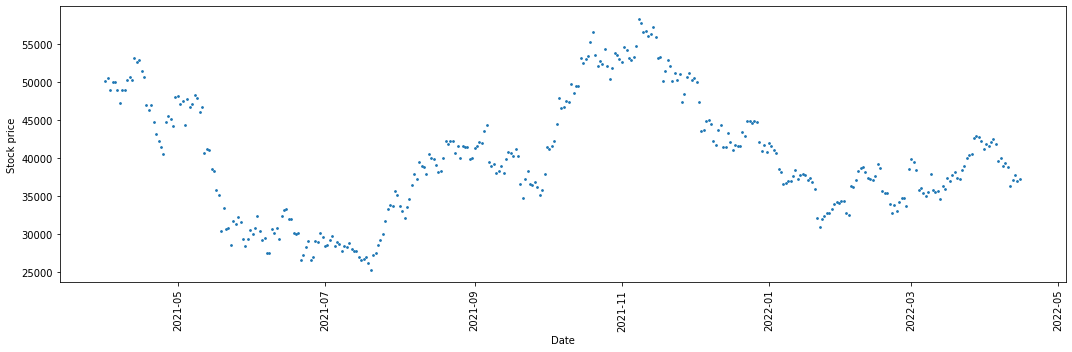

In [297]:
plot(data,start_date,end_date) 

In [298]:
portefolio_total_eur = 100
portefolio_btc_devise_btc = 0.0166
portefolio_btc_devise_eur = get_price_date_eur_portefolio_btc(data,start_date,portefolio_btc_devise_btc)
sum_euro_invest = 0 

print(portefolio_total_eur+portefolio_btc_devise_eur)

932.8657695354001


In [294]:
portefolio_total_eur,portefolio_btc_devise_btc = DCA_optimize(data,start_date,end_date,10,[-25,25],portefolio_total_eur,portefolio_btc_devise_btc)

2021-04-01 00:00:00 100 0.0166
sell -25.40368625807804
2021-04-11 00:00:00 125.40368625807804 0.016093674482360664
sell -11.59697310281549
2021-04-21 00:00:00 137.00065936089354 0.015864526932570705
buy 53.714801808031204
2021-05-01 00:00:00 83.28585755286232 0.017063940863710523
sell -39.62398381471124
2021-05-11 00:00:00 122.90984136757356 0.01624032944803964
2021-05-21 00:00:00 122.90984136757356 0.01624032944803964
buy 95.83187964716276
2021-05-31 00:00:00 27.077961720410798 0.019369245334218917
2021-06-10 00:00:00 27.077961720410798 0.019369245334218917
sell -5.8438723664397445
2021-06-20 00:00:00 32.921834086850545 0.019175421860715757
buy 20.674915723524084
2021-06-30 00:00:00 12.246918363326461 0.019862940686143634
sell -22.597459145327498
2021-07-10 00:00:00 34.84437750865396 0.01909835204356188
buy 7.447721176996794
2021-07-20 00:00:00 27.39665633165717 0.01936223974587066
buy 35.348465787360375
Sorry you don't have enough money
2021-07-30 00:00:00 27.39665633165717 0.0193622

In [262]:
(portefolio_total_eur + get_price_date_eur_portefolio_btc(data,end_date,portefolio_btc_devise_btc))

757.199096626033